#Derivation of $\mathbf{\tau}$ for shallow water equations

 - State conservation variables formulation
\\[U_t + \nabla \cdot F = 0 \\]
 - Derive quasilinear form
\\[U_t + A_1 U_x + A_2 U_y = 0\\]
 - State entropy, $H$, derive entropy variables $V = H_U$, and quasi-linear entropy formulation 
\\[ \tilde{A}_0 V_t + \tilde{A}_1 V_x + \tilde{A}_2 V_y=0 \\]
$\tilde{A}_0 = H_{U,U}^{-1}$, $\tilde{A}_1 = A_1 \tilde{A}_0$, and  $\tilde{A}_2 = A_2 \tilde{A}_0$.
 - Verify that these matrices are symmetric, etc. This is  the "Symmetric form with Riemannian metric".
 - Assuming linearity (freezing coefficients) change variables to get the "Symmetric form with Euclidean metric". Fist change from entropy variables to a new set of variables $X$ using the Cholesky factorization $\tilde{A}_0=LL^t$ and the variables $X = L^t V$. This  yields
 \\[ L L^t V_t + \tilde{A}_1 L^{-t} L^t V_x + \tilde{A}_2 L^{-t} L^t V_y = 0 \\]
 \\[X_t + L^{-1} \tilde{A}_1 L^{-t} X_x + L^{-1} \tilde{A}_2 L^{-t} X_y = 0\\]
\\[ X_t + \hat{A}_1 X_x + \hat{A}_2 X_y = 0 \\]
where $\hat{A}_1 = L^{-1} \tilde{A}_1 L^{-t}$ and $\hat{A}_2 = L^{-1} \tilde{A}_2 L^{-t}$.
 - Diagonalize the the (now symmetric) flux Jacobians $\hat{A}_1$ and $\hat{A}_2$ as 
\\[ \hat{A}_1 = Y_1 \Lambda_1 Y_1^{-1} \\]
\\[ \hat{A}_2 = Y_2 \Lambda_2 Y_2^{-1} \\]
 - Normalize  the rows of $Y_1$ and $Y_2$ so that $Y Y^t=Y^t Y = I$ (they are orthogonal by symmetry so this  makes them orthonormal).
 - Derive $\hat{\tau}_i$ for the diagonalized system in each direction (assuming 1D in $x$ or $y$)
 - Derive $\tilde{\tau}$ for entropy variables using the properly scaled eigenvectors
\\[ \Phi = L^{-t} Y \\]
In other words, using the normalized $Y$ to build the correct scaling for $\Phi$.

- Since the  relationship between eigenvectors in conservation variables, entropy variables, and Euclidean variables is

\\[ \Psi = A_0 \Phi = L Y \\]

- NOTE: I actually compute a sets of eigenvectors using the flux Jacobians for conservation variables, then compute the normalized $Y$ from those sets using $L$, then transform back to the properly $\Phi$.

- Derive $\tau$ for conservation variables (or any other set of variable) by doing
\\[ \tau = Y_v \tilde{\tau} \\]
where $Y_v$ is the change of variables from given variables to entropy variables.

# Conservation laws in conservation variables

\\[ U_t + \nabla \cdot F = 0 \\]

Set up symbolic variables, define U, and F

In [1]:
from sympy import *
init_printing()
c,h,g,dt,s = symbols('c,h,g,dt,s',positive=true)
u,v,hu,hv = symbols('u,v,hu,hv')

U =  Matrix([[h], [hu], [hv]])
F =  Matrix([[h*u, h*v], [g*h**2/2 + h*u**2, h*u*v], [h*u*v, g*h**2/2 + h*v**2]])
F_1 =  Matrix([[h*u], [g*h**2/2 + h*u**2], [h*u*v]])
F_2 =  Matrix([[h*v], [h*u*v], [g*h**2/2 + h*v**2]])


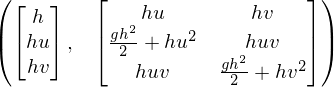

In [2]:
U = Matrix([h,hu,hv])
print "U = ",U
F = Matrix([[h*u            , h*v],
            [h*u*u+h**2*g/2 , h*u*v],
            [h*u*v          , h*v*v+h**2*g/2]])
print "F = ",F
print "F_1 = ",F[:,0]
print "F_2 = ",F[:,1]
U,F

FC =  Matrix([
[                  hu,                   hv],
[(g*h**3/2 + hu**2)/h,              hu*hv/h],
[             hu*hv/h, (g*h**3/2 + hv**2)/h]])
A0 =  Matrix([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
A1 =  Matrix([
[         0,   1, 0],
[g*h - u**2, 2*u, 0],
[      -u*v,   v, u]])
A2 =  Matrix([
[         0, 0,   1],
[      -u*v, v,   u],
[g*h - v**2, 0, 2*v]])


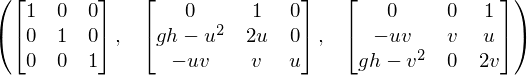

In [3]:
FC =  simplify(F.subs(h*u,hu).subs(h*v,hv).subs(u,hu/h).subs(v,hv/h))
print "FC = ",FC
A0 = U.jacobian(U)
print "A0 = ",A0
A1 = simplify(FC[:,0].jacobian(U).subs(hu,h*u).subs(hv,h*v))
print "A1 = ",A1
A2 = simplify(FC[:,1].jacobian(U).subs(hu,h*u).subs(hv,h*v))
print "A2 = ",A2
A0,A1,A2

In [4]:
#Psi1,lambda1 = A1.diagonalize()
#Psi1 = simplify(Psi1.subs(sqrt(g)*sqrt(h),c))
#lambda1 = simplify(lambda1.subs(sqrt(g)*sqrt(h),c))
#print "Psi1",Psi1
#print "lambda1",lambda1
#Psi1,lambda1

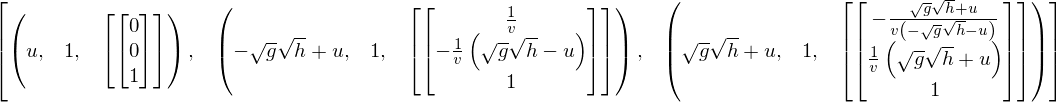

In [5]:
EA1 = A1.eigenvects(simplify=True)
EA1

In [6]:
#lambda1 = [EA1[0][0],EA1[1][0],EA1[2][0]]
#Psi1 = EA1[0][2][0].transpose()
#Psi1 = Psi1.col_join(EA1[1][2][0].transpose())
#Psi1 = Psi1.col_join(EA1[2][2][0].transpose())
#Psi1 = simplify(Psi1.transpose())
#Psi1

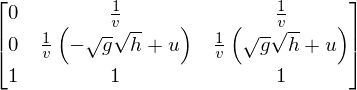

In [7]:
lambda1 = [EA1[0][0],EA1[1][0],EA1[2][0]]
Psi1 = EA1[0][2][0].row_join(EA1[1][2][0]).row_join(EA1[2][2][0])
Psi1 = simplify(Psi1)
Psi1

Check that this is the solution to the eigenvalue problem

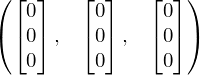

In [8]:
(A1-lambda1[0]*eye(3))*Psi1[:,0],simplify((A1-lambda1[1]*eye(3))*Psi1[:,1]),simplify((A1-lambda1[2]*eye(3))*Psi1[:,2])

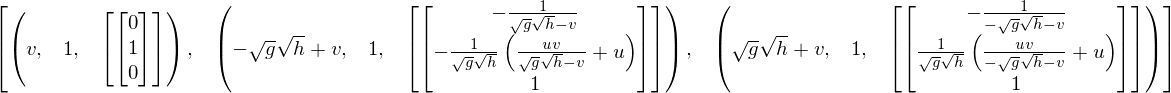

In [9]:
EA2 = A2.eigenvects(simplify=True)
EA2

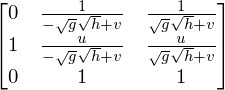

In [10]:
lambda2 = [EA2[0][0],EA2[1][0],EA2[2][0]]
Psi2 = EA2[0][2][0].row_join(EA2[1][2][0]).row_join(EA2[2][2][0])
Psi2 = simplify(Psi2)
Psi2

Check that this is the solution to the eigenvalue problem

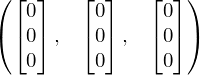

In [11]:
(A2-lambda2[0]*eye(3))*Psi2[:,0],simplify((A2-lambda2[1]*eye(3))*Psi2[:,1]),simplify((A2-lambda2[2]*eye(3))*Psi2[:,2])

Check that $A_1$ and $A_2$ are correct

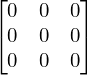

In [12]:
A1_check = Matrix([[0,1,0],[-u**2+g*h,2*u,0],[-u*v,v,u]])
A1 - A1_check

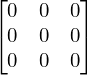

In [13]:
A2_check = Matrix([[0,0,1],[-u*v,v,u],[-v**2+g*h,0,2*v]])
A2 - A2_check

# Entropy variables (Symmetric formulation with Riemannian metric)

- Define the entropy $H$
- Derive quasilinear formulation in entropy variables

Entropy, H =  Matrix([[g*h**2/2 + h*(u**2 + v**2)/2]])
Entropy, H(U) =  Matrix([[(g*h**3 + hu**2 + hv**2)/(2*h)]])
Entropy Variables, V =  Matrix([[g*h - u**2/2 - v**2/2, u, v]])
Atilde0_inv =  Matrix([
[(g*h + u**2 + v**2)/h, -u/h, -v/h],
[                 -u/h,  1/h,    0],
[                 -v/h,    0,  1/h]])
Atilde0_info is symmetric is  True


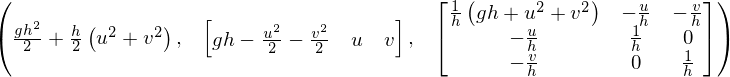

In [14]:
H = Matrix([[g*h**2/2 + h*(u**2 + v**2)/2]])
print "Entropy, H = ",H
HC = simplify(H.subs(h*u,hu).subs(h*v,hv).subs(u,hu/h).subs(v,hv/h))
print "Entropy, H(U) = ",HC
V = simplify(HC.jacobian(U))
V_simp = simplify(V.subs(hu,h*u).subs(hv,h*v))
print "Entropy Variables, V = ",V_simp
Atilde0_inv = simplify(V.jacobian(U).subs(hu,h*u).subs(hv,h*v))
print "Atilde0_inv = ",Atilde0_inv
print "Atilde0_info is symmetric is ",Atilde0_inv.is_symmetric()
H[0],V_simp,Atilde0_inv

Compute matrices and check  symmetry

Riemannian metric, Atilde0 =  Matrix([
[1/g,        u/g,        v/g],
[u/g, h + u**2/g,      u*v/g],
[v/g,      u*v/g, h + v**2/g]])
Atilde0 is symmetric is  True
Atilde1 =  Matrix([
[       u/g,       h + u**2/g,            u*v/g],
[h + u**2/g,   3*h*u + u**3/g, v*(g*h + u**2)/g],
[     u*v/g, v*(g*h + u**2)/g, u*(g*h + v**2)/g]])
Atilde1 is symmetric is  True
Atilde2 Matrix([
[       v/g,            u*v/g,       h + v**2/g],
[     u*v/g, v*(g*h + u**2)/g, u*(g*h + v**2)/g],
[h + v**2/g, u*(g*h + v**2)/g,   3*h*v + v**3/g]])
Atilde2 is symmetric is  True


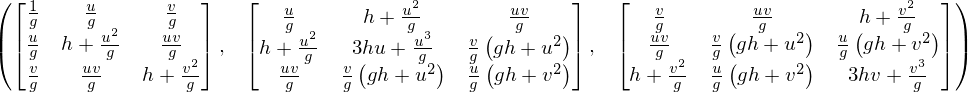

In [15]:
Atilde0 = simplify(Atilde0_inv.inverse())
print "Riemannian metric, Atilde0 = ",Atilde0
print "Atilde0 is symmetric is ",Atilde0.is_symmetric()
Atilde1 = simplify(A1*Atilde0)
print "Atilde1 = ",Atilde1
print "Atilde1 is symmetric is ",Atilde1.is_symmetric()
Atilde2 = simplify(A2*Atilde0)
print "Atilde2",Atilde2
print "Atilde2 is symmetric is ",Atilde2.is_symmetric()
Atilde0,Atilde1,Atilde2

#Symmetric formulation with Euclidean metric

Compute Cholesky factorization of $\tilde{A}_0$ and change varibles assuming constant coefficients

L =  Matrix([
[1/sqrt(g),       0,       0],
[u/sqrt(g), sqrt(h),       0],
[v/sqrt(g),       0, sqrt(h)]])
LL^t - Atilde0 =  Matrix([
[0, 0, 0],
[0, 0, 0],
[0, 0, 0]])


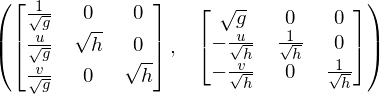

In [16]:
L = Atilde0.cholesky()
L_inv = L.inverse()
print "L = ",L
print "LL^t - Atilde0 = ",L*L.transpose() - Atilde0
L,L_inv

Before normalization, Y1 =  Matrix([
[        0,  sqrt(g)/v, sqrt(g)/v],
[        0, -sqrt(g)/v, sqrt(g)/v],
[1/sqrt(h),          0,         0]])
Y1^t Y1 = D1 =  Matrix([
[2*g/v**2,        0,   0],
[       0, 2*g/v**2,   0],
[       0,        0, 1/h]])


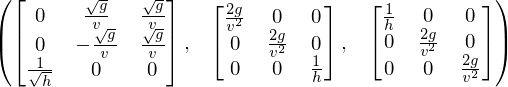

In [17]:
Y1 = simplify(L_inv*Psi1)
print "Before normalization, Y1 = ",Y1
D1 = simplify(Y1*Y1.T)
print "Y1^t Y1 = D1 = ",D1
Y1,D1,simplify(Y1.T*Y1)

After normalization, Y1 =  Matrix([
[0,  sqrt(2)/(2*v*sqrt(v**(-2))), sqrt(2)/(2*v*sqrt(v**(-2)))],
[0, -sqrt(2)/(2*v*sqrt(v**(-2))), sqrt(2)/(2*v*sqrt(v**(-2)))],
[1,                            0,                           0]])
Y1Y1^t = I =  Matrix([
[sqrt(2)*sqrt(g)/(v**2*sqrt(v**(-2))),                                    0,         0],
[                                   0, sqrt(2)*sqrt(g)/(v**2*sqrt(v**(-2))),         0],
[                                   0,                                    0, 1/sqrt(h)]])


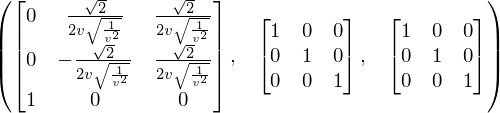

In [18]:
Y1N = Matrix(Y1.row(0)/sqrt(D1[0,0])).col_join(Y1.row(1)/sqrt(D1[1,1])).col_join(Y1.row(2)/sqrt(D1[2,2]))
Y1N = simplify(Y1N)
print "After normalization, Y1 = ",Y1N
print "Y1Y1^t = I = ",simplify(Y1N*Y1.T)
Y1N,simplify(Y1N.T*Y1N),simplify(Y1N*Y1N.T)

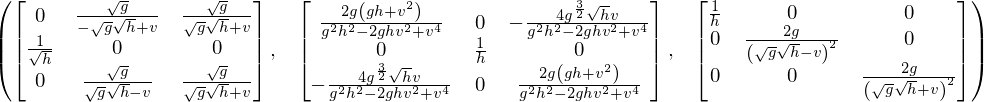

In [19]:
Y2 = simplify(L_inv*Psi2)
D2 = simplify(Y2*Y2.T)
D2t = simplify(Y2.T*Y2)
Y2,D2,D2t

Something tricky is going on since $Y_2 Y_2^t$ should be diagonal but only $Y_2^t Y_2$ is coming out diagonal. 

After normalization, Y2 =  Matrix([
[0, sqrt(2)/(2*sqrt((g*h + v**2)/(g**2*h**2 - 2*g*h*v**2 + v**4))*(-sqrt(g)*sqrt(h) + v)), sqrt(2)/(2*sqrt((g*h + v**2)/(g**2*h**2 - 2*g*h*v**2 + v**4))*(sqrt(g)*sqrt(h) + v))],
[1,                                                                                     0,                                                                                    0],
[0,  sqrt(2)/(2*sqrt((g*h + v**2)/(g**2*h**2 - 2*g*h*v**2 + v**4))*(sqrt(g)*sqrt(h) - v)), sqrt(2)/(2*sqrt((g*h + v**2)/(g**2*h**2 - 2*g*h*v**2 + v**4))*(sqrt(g)*sqrt(h) + v))]])
Y2Y2^t = I =  Matrix([
[                                                                                                  1, 0, -2*sqrt(g)*sqrt(h)*v*(g**2*h**2 - 2*g*h*v**2 + v**4)/(g**3*h**3 - g**2*h**2*v**2 - g*h*v**4 + v**6)],
[                                                                                                  0, 1,                                                                                               

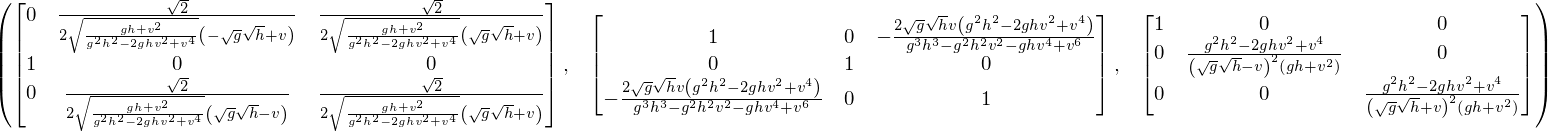

In [20]:
Y2N = Matrix(Y2.row(0)/sqrt(D2[0,0])).col_join(Y2.row(1)/sqrt(D2[1,1])).col_join(Y2.row(2)/sqrt(D2[2,2]))
Y2N = simplify(Y2N)
print "After normalization, Y2 = ",Y2N
print "Y2Y2^t = I = ",simplify(Y2N*Y2N.T)
Y2N,simplify(Y2N*Y2N.T),simplify(Y2N.T*Y2N)

After normalization, Y2 =  Matrix([
[0, -sqrt(2)/(2*(sqrt(g)*sqrt(h) - v)*sqrt((sqrt(g)*sqrt(h) - v)**(-2))), sqrt(2)/(2*(sqrt(g)*sqrt(h) + v)*sqrt((sqrt(g)*sqrt(h) + v)**(-2)))],
[1,                                                                    0,                                                                   0],
[0,  sqrt(2)/(2*(sqrt(g)*sqrt(h) - v)*sqrt((sqrt(g)*sqrt(h) - v)**(-2))), sqrt(2)/(2*(sqrt(g)*sqrt(h) + v)*sqrt((sqrt(g)*sqrt(h) + v)**(-2)))]])
Y2Y2^t = I =  Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])


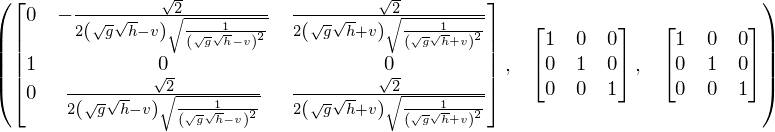

In [21]:
Y2N = Matrix(Y2.T.row(0)/sqrt(D2t[0,0])).col_join(Y2.T.row(1)/sqrt(D2t[1,1])).col_join(Y2.T.row(2)/sqrt(D2t[2,2])).T
Y2N = simplify(Y2N)
print "After normalization, Y2 = ",Y2N
print "Y2Y2^t = I = ",simplify(Y2N*Y2N.T)
Y2N,simplify(Y2N*Y2N.T),simplify(Y2N.T*Y2N)

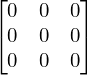

In [22]:
Lambda1 = eye(3)
Lambda1[0,0] = lambda1[0]
Lambda1[1,1] = lambda1[1]
Lambda1[2,2] = lambda1[2]
simplify(Y1N*Lambda1*Y1N.T - L_inv*Atilde1*L_inv.T)

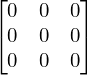

In [23]:
Lambda2 = eye(3)
Lambda2[0,0] = lambda2[0]
Lambda2[1,1] = lambda2[1]
Lambda2[2,2] = lambda2[2]
simplify(Y2N*Lambda2*Y2N.T - L_inv*Atilde2*L_inv.T)

Checkt that $Y_1$ diagonalizes $\hat{A}_1$

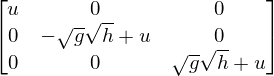

In [24]:
simplify(Y1N.T*L_inv*Atilde1*L_inv.T*Y1N)

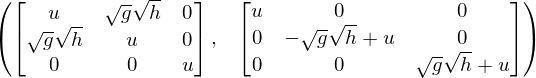

In [25]:
Ahat1 = simplify(L_inv*Atilde1*L_inv.T)
Ahat1,simplify(Y1N.T*Ahat1*Y1N)

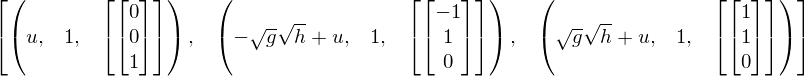

In [26]:
Ehat1 = Ahat1.eigenvects()
Ehat1

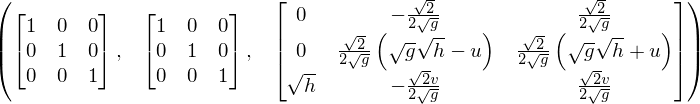

In [27]:
Y1_tmp = Ehat1[0][2][0].row_join(Ehat1[1][2][0]/sqrt(2)).row_join(Ehat1[2][2][0]/sqrt(2))
Psi1_tmp = simplify(L*Y1_tmp)
Y1_tmp*Y1_tmp.T,Y1_tmp.T*Y1_tmp,Psi1_tmp

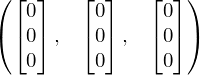

In [28]:
(A1-lambda1[0]*eye(3))*Psi1_tmp[:,0],simplify((A1-lambda1[1]*eye(3))*Psi1_tmp[:,1]),simplify((A1-lambda1[2]*eye(3))*Psi1_tmp[:,2])

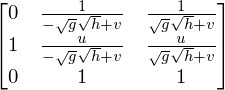

In [29]:
lambda2 = [EA2[0][0],EA2[1][0],EA2[2][0]]
Psi2 = EA2[0][2][0].row_join(EA2[1][2][0]).row_join(EA2[2][2][0])
Psi2 = simplify(Psi2)
Psi2

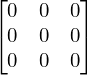

In [30]:
Lambda2 = eye(3)
Lambda2[0,0] = lambda2[0]
Lambda2[1,1] = lambda2[1]
Lambda2[2,2] = lambda2[2]
simplify(Y2N*Lambda2*Y2N.T - L_inv*Atilde2*L_inv.T)

Check that $Y_2$ diagonalizes $\hat{A}_2$

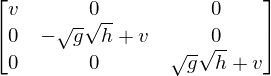

In [31]:
simplify(Y2N.T*L_inv*Atilde2*L_inv.T*Y2N)

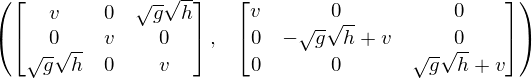

In [32]:
Ahat2 = simplify(L_inv*Atilde2*L_inv.T)
Ahat2,simplify(Y2N.T*Ahat2*Y2N)

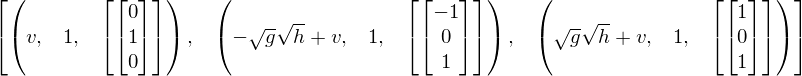

In [33]:
Ehat2 = Ahat2.eigenvects()
Ehat2

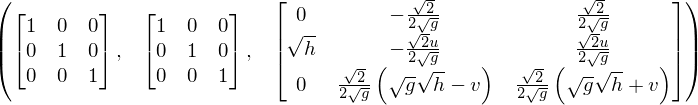

In [34]:
Y2_tmp = Ehat2[0][2][0].row_join(Ehat2[1][2][0]/sqrt(2)).row_join(Ehat2[2][2][0]/sqrt(2))
Psi2_tmp = L*Y2_tmp
Y2_tmp*Y2_tmp.T,Y2_tmp.T*Y2_tmp,simplify(L*Y2_tmp)

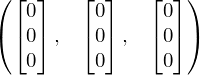

In [35]:
(A2-lambda2[0]*eye(3))*Psi2_tmp[:,0],simplify((A2-lambda2[1]*eye(3))*Psi2_tmp[:,1]),simplify((A2-lambda2[2]*eye(3))*Psi2_tmp[:,2])

#$\tau$ calculations

In [36]:
dxi1_dx1,dxi1_dx2,dxi2_dx1,dxi2_dx2 = symbols('dxi1_dx1,dxi1_dx2,dxi2_dx1,dxi2_dx2')

In [38]:
#B = simplify(4*I/dt**2 + 
#dxi1_dx1*dxi1_dx1*A1*A1+
#dxi1_dx1*dxi1_dx2*A1*A2+
#dxi1_dx2*dxi1_dx2*A2*A2+
#dxi2_dx1*dxi2_dx1*A1*A1+
#dxi2_dx1*dxi2_dx2*A1*A2+
#dxi2_dx2*dxi2_dx2*A2*A2)
#B

In [39]:
#s = symbols('s',positive=true)
#B = B.subs(u**2+v**2,s)
#B = B.subs(sqrt(g*h),c)
#B = B.subs(g*h,c**2)
#B